<a href="https://colab.research.google.com/github/szandian/test/blob/main/HW1_Somayeh_Zandian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd


# **1.	Data Preprocessing:**


**1.   Load the dataset and print a sample number of rows.**


In [23]:
dataset=pd.read_csv("insurance.csv")
dataset.head(10)

,Age,Gender,BMI,Children,Smoker,Region,Expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,NaN,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [24]:
print(dataset.shape)

(1338, 7)


**2.   Find the number of rows with any missing values. Remove any row with a missing value.**


In [25]:
row,col=np.where(dataset.isna()==True)
print(row,col)

[   8  283  425  572  580  652  729  769  788  810  914  946 1100 1235
 1313 1334 1335] [2 2 1 1 2 5 1 2 5 6 1 2 2 2 1 1 2]


In [26]:
clean_dataset=dataset.dropna()
print(clean_dataset.shape)

(1321, 7)


**3.   Convert 'Gender', 'Smoker', and 'Region' into numerical values suitable for regression analysis (e.g., using one-hot encoding for 'region' and binary encoding for 'sex' and 'smoker').**


In [27]:
print(clean_dataset['Gender'].unique())
print(clean_dataset['Smoker'].unique())
print(clean_dataset['Region'].unique())



['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [28]:
clean_dataset['Gender_encoded'] = clean_dataset['Gender'].map({'female': 0, 'male': 1})
clean_dataset['Smoker_encoded'] = clean_dataset['Smoker'].map({'no': 0, 'yes': 1})

clean_dataset


,Age,Gender,BMI,Children,Smoker,Region,Expenses,Gender_encoded,Smoker_encoded
0,19,female,27.9,0,yes,southwest,16884.92,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,0
4,32,male,28.9,0,no,northwest,3866.86,1,0
...,...,...,...,...,...,...,...,...,...
1331,23,female,33.4,0,no,southwest,10795.94,0,0
1332,52,female,44.7,3,no,southwest,11411.69,0,0
1333,50,male,31.0,3,no,northwest,10600.55,1,0
1336,21,female,25.8,0,no,southwest,2007.95,0,0


In [29]:
clean_dataset = pd.get_dummies(clean_dataset, columns = [ 'Region'])
clean_dataset


,Age,Gender,BMI,Children,Smoker,Expenses,Gender_encoded,Smoker_encoded,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,19,female,27.9,0,yes,16884.92,0,1,0,0,0,1
1,18,male,33.8,1,no,1725.55,1,0,0,0,1,0
2,28,male,33.0,3,no,4449.46,1,0,0,0,1,0
3,33,male,22.7,0,no,21984.47,1,0,0,1,0,0
4,32,male,28.9,0,no,3866.86,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1331,23,female,33.4,0,no,10795.94,0,0,0,0,0,1
1332,52,female,44.7,3,no,11411.69,0,0,0,0,0,1
1333,50,male,31.0,3,no,10600.55,1,0,0,1,0,0
1336,21,female,25.8,0,no,2007.95,0,0,0,0,0,1


In [30]:
clean_dataset = clean_dataset.drop(['Gender', 'Smoker'], axis=1)
clean_dataset

,Age,BMI,Children,Expenses,Gender_encoded,Smoker_encoded,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,19,27.9,0,16884.92,0,1,0,0,0,1
1,18,33.8,1,1725.55,1,0,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,0,1,0
3,33,22.7,0,21984.47,1,0,0,1,0,0
4,32,28.9,0,3866.86,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1331,23,33.4,0,10795.94,0,0,0,0,0,1
1332,52,44.7,3,11411.69,0,0,0,0,0,1
1333,50,31.0,3,10600.55,1,0,0,1,0,0
1336,21,25.8,0,2007.95,0,0,0,0,0,1


**4.   Normalize the features using Min-Max scaling.**

In [31]:
from sklearn.preprocessing import MinMaxScaler
# Create the MinMaxScaler object
scaler = MinMaxScaler()
# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(clean_dataset)
# The scaled data
scaled_data



array([[0.02173913, 0.32075472, 0.48148148, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.47978437, 0.48888889, ..., 0.        , 1.        ,
        0.        ],
       [0.2173913 , 0.45822102, 0.5037037 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.69565217, 0.40431267, 0.5037037 , ..., 1.        , 0.        ,
        0.        ],
       [0.06521739, 0.26415094, 0.48148148, ..., 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.35309973, 0.48148148, ..., 1.        , 0.        ,
        0.        ]])

In [32]:
clean_dataset.columns

Index(['Age', 'BMI', 'Children', 'Expenses', 'Gender_encoded',
       'Smoker_encoded', 'Region_northeast', 'Region_northwest',
       'Region_southeast', 'Region_southwest'],
      dtype='object')

In [33]:
scaled_data = pd.DataFrame(scaled_data,columns=clean_dataset.columns)


# **2.	Splitting the Data:**

**1.   Divide the data into “features” and “target” subsets.**

**2.   Split the data into training and testing subsets (commonly a 70/30, 75/25, or 80/20 split)**



In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = scaled_data.drop('Expenses', axis=1)  # Features
y = scaled_data['Expenses']  # Target
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# The resulting sets
print("X_train:\n", X_train)
print("\nX_test:\n", X_test)
print("\ny_train:\n", y_train)
print("\ny_test:\n", y_test)


X_train:
            Age       BMI  Children  Gender_encoded  Smoker_encoded  \
1171  0.108696  0.336927  0.488889             0.0             1.0   
309   0.021739  0.234501  0.481481             0.0             0.0   
209   0.043478  0.458221  0.488889             1.0             0.0   
363   0.673913  0.398922  0.488889             0.0             0.0   
140   0.173913  0.444744  0.488889             1.0             0.0   
...        ...       ...       ...             ...             ...   
1095  0.173913  0.377358  0.488889             1.0             0.0   
1130  0.456522  0.439353  0.496296             1.0             0.0   
1294  0.152174  0.382749  0.481481             0.0             1.0   
860   0.695652  0.544474  0.481481             1.0             0.0   
1126  0.021739  0.444744  0.481481             0.0             1.0   

      Region_northeast  Region_northwest  Region_southeast  Region_southwest  
1171               0.0               0.0               1.0            

# **3.	Gradient Descent Implementation:**

**1.	Implement the gradient descent algorithm (without the Scikit-Learn library) to find the regression line. Initialize parameters randomly and update them iteratively to minimize the loss function. Record the loss value for each iteration:**

**2. Show the coefficients and intercept of the model.**

In [36]:
from sklearn.metrics import mean_squared_error


In [37]:
X_train.shape[0]

1056

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Preparing the data by adding a column of ones for the intercept term
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
m = len(X_train)  # Number of data points
alpha = 0.01  # Learning rate
n_iterations = 10000  # Number of iterations
W = np.random.randn(X_train.shape[1]+1, 1)  # Weight matrix (including intercept)

loss = []  # To record the loss value for each iteration

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(W) - y_train.values.reshape(-1, 1))
    W = W - alpha * gradients
    predictions = X_b.dot(W)
    loss.append(mean_squared_error(y_train, predictions))

# Extracting the coefficients and the intercept from the weight matrix
intercept = W[0][0]
coefficients = W[1:]

intercept, coefficients.flatten(), loss[-1]  # Displaying the final intercept, coefficients, and the last loss value


(-0.36526231092139194,
 array([ 0.19833352,  0.23633075, -0.11140272, -0.00364253,  0.38265208,
         0.36403708,  0.35924146,  0.33713074,  0.34356593]),
 0.009247338026459686)

**3. Modify the code to implement the exponential decay method for the learning rate.**

In [39]:
import matplotlib.pyplot as plt

# Initial learning rate and decay rate
alpha_0 = 0.01
decay_rate = 0.001

# Reinitializing the weight matrix for the new run
W = np.random.randn(X_train.shape[1]+1, 1)

loss_decay = []  # To record the loss value for each iteration with decaying learning rate

# Gradient Descent with Exponential Decay for Learning Rate
for iteration in range(n_iterations):
    alpha_t = alpha_0 * np.exp(-decay_rate * iteration)  # Update learning rate with exponential decay
    gradients = 1/m * X_b.T.dot(X_b.dot(W) - y_train.values.reshape(-1, 1))
    W = W - alpha_t * gradients
    predictions = X_b.dot(W)
    loss_decay.append(mean_squared_error(y_train, predictions))

# Extracting the coefficients and the intercept from the weight matrix
intercept = W[0][0]
coefficients = W[1:]

intercept, coefficients.flatten(), loss[-1]  # Displaying the final intercept, coefficients, and the last loss value



(0.343344451997359,
 array([-0.45134664,  1.3417506 , -0.65798222, -0.20583944,  0.18728278,
        -0.04612767,  0.05383071, -0.07196703, -0.19373463]),
 0.009247338026459686)

**3. Plot the loss values as a function of the number of iterations for the constant and decaying learning rates.**

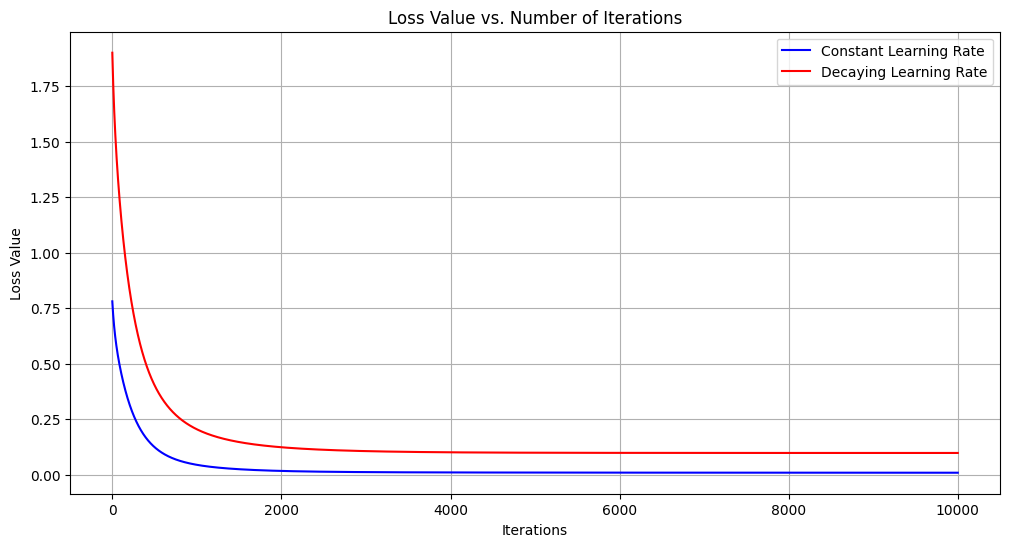

In [40]:

# Plotting the loss values
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Constant Learning Rate', color='blue')
plt.plot(loss_decay, label='Decaying Learning Rate', color='red')
plt.title('Loss Value vs. Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True)
plt.show()

# **4.	Model Evaluation:**

**1. Predict the expenses for the testing dataset using the trained model.**

**2. Compute the Mean Absolute Error (MAE) and Mean Squared Error (MSE) of the predictions.**

In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
X_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
predictions = X_b.dot(W)
MSE_GD= mean_squared_error(y_test, predictions)
MAE_GD= mean_absolute_error(y_test, predictions)
print(MSE_GD,MAE_GD)



0.07703326437299275 0.2206780927441202


**3. Plot a histogram of the error distribution.**

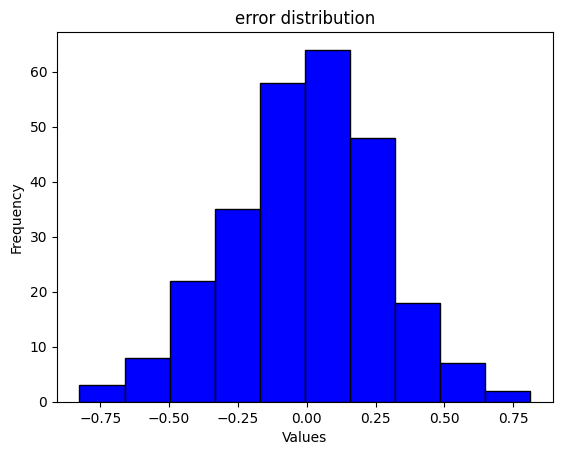

In [43]:
import matplotlib.pyplot as plt


# Plotting histogram
plt.hist(y_test.values.reshape(-1, 1)- predictions, bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('error distribution')

# Display the plot
plt.show()


# **5.	Learning Rate Analysis:**
**1. Demonstrate the effect of varying the learning rate on the convergence of the gradient descent algorithm.**

In [44]:
def Gradient_Descent(X_b,y_train,alpha,W):
  loss = []  # To record the loss value for each iteration

  # Gradient Descent
  for iteration in range(n_iterations):
      gradients = 1/m * X_b.T.dot(X_b.dot(W) - y_train.values.reshape(-1, 1))
      W = W - alpha * gradients
      predictions = X_b.dot(W)
      loss.append(mean_squared_error(y_train, predictions))

  return loss

In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Preparing the data by adding a column of ones for the intercept term
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
m = len(X_train)  # Number of data points
alpha1 = 0.001  # Learning rate
alpha2 = 0.01
alpha3 = 0.1
n_iterations = 10000  # Number of iterations
W = np.random.randn(X_train.shape[1]+1, 1)  # Weight matrix (including intercept)

loss1= Gradient_Descent(X_b,y_train,alpha1,W)
loss2= Gradient_Descent(X_b,y_train,alpha2,W)
loss3= Gradient_Descent(X_b,y_train,alpha3,W)


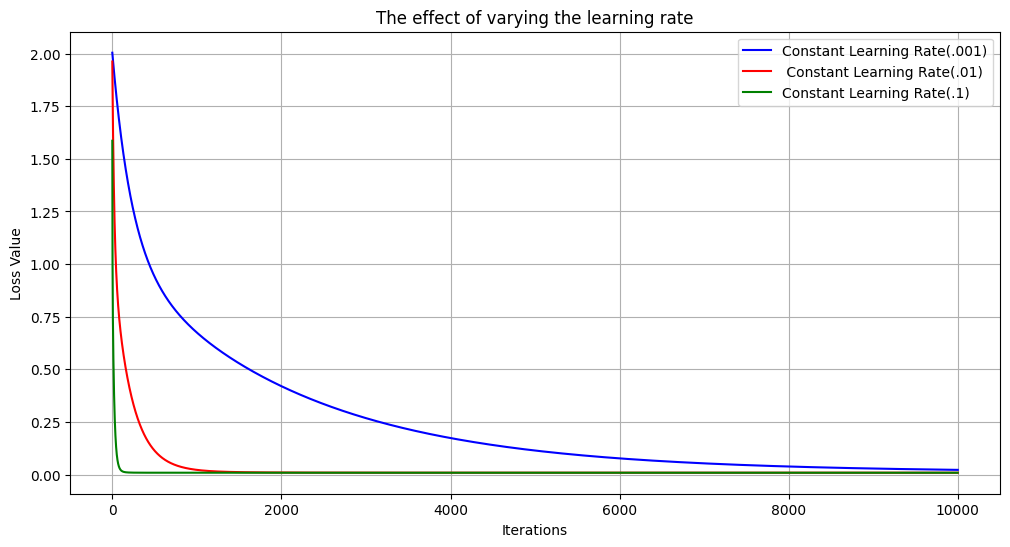

In [46]:
# Plotting the loss values
plt.figure(figsize=(12, 6))
plt.plot(loss1, label='Constant Learning Rate(.001)', color='blue')
plt.plot(loss2, label=' Constant Learning Rate(.01)', color='red')
plt.plot(loss3, label='Constant Learning Rate(.1)', color='green')
plt.title('The effect of varying the learning rate')
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.legend()
plt.grid(True)
plt.show()


# **6.	Scikit-learn Implementation:**

**1.	Repeat the regression using the linear_model.LinearRegression class from scikit-learn.**

**2.	Compute MAE and MSE for comparison.**


In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
predictions= model.predict(X_test)
MSE_SK= mean_squared_error(y_test, predictions)
MAE_SK= mean_absolute_error(y_test, predictions)
print(MSE_SK,MAE_SK)


0.010988718038258787 0.0732189209816495


# **7.	Normal Equation Implementation:**

**1.	Use the normal equation method to find the regression line directly.**

**2. Compare the MAE and MSE with previous methods.**


In [48]:
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
W = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train.values.reshape(-1, 1))
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
predictions = X_b_test.dot(W)
MSE_NE= mean_squared_error(y_test, predictions)
MAE_NE= mean_absolute_error(y_test, predictions)
print(MSE_NE,MAE_NE)



0.01099765491152058 0.07322090456300863


# **8.	Comparison:**
**1. Compare the three solutions in terms of MAE, MSE, and computational efficiency.**

In [49]:
import pandas as pd

# Creating a DataFrame to represent the comparison table
comparison_table = pd.DataFrame({
    "Method": ["Gradient Descent", "Scikit-learn LinearRegression", "Normal Equation"],
    "Computational Complexity": ["O(m * n) per iteration", "O(n^2 * m)", "O(n^2.373) or O(n^3)"],
    "Scalability with Features (n)": ["Good (Linear)", "Moderate (n^2 term)", "Poor (Cubic)"],
    "Scalability with Examples (m)": ["Good (Linear, but iterative)", "Good (Linear)", "Excellent (Independent of m)"],
    "Best Use Case": ["Large datasets, many features", "Moderate size datasets, ease of use", "Small to moderate number of features, large m"]
})
comparison_table['MSE']=[MSE_GD,MSE_SK,MSE_NE]
comparison_table['MAE']=[MAE_GD,MAE_SK,MAE_NE]

comparison_table


,Method,Computational Complexity,Scalability with Features (n),Scalability with Examples (m),Best Use Case,MSE,MAE
0,Gradient Descent,O(m * n) per iteration,Good (Linear),"Good (Linear, but iterative)","Large datasets, many features",0.077033,0.220678
1,Scikit-learn LinearRegression,O(n^2 * m),Moderate (n^2 term),Good (Linear),"Moderate size datasets, ease of use",0.010989,0.073219
2,Normal Equation,O(n^2.373) or O(n^3),Poor (Cubic),Excellent (Independent of m),"Small to moderate number of features, large m",0.010998,0.073221
